In [1]:
import matplotlib.pyplot as plt
import numpy as np

### a) Signal Representation and Summary Properties:
Consider the following signal:
$$x(t) = 
\begin{cases} 
    \sin(2000\pi t)sin(4\pi t) & 0\leq t \leq \frac{1}{4} \\
    0 & \text{elsewhere}
\end{cases}
$$
which represents a 1 kHz sine wave windowed with a sine window to a
duration of 1/4 second. Do the following:

<b> 1. Graph the signal </b>

In [139]:
#Fs much higher than 2fs_max for 'continuous' simulation
Fs = 100000
n_points = np.int(np.ceil(Fs/4))
t1 = np.linspace(0, 1/4, n_points)
#t2 = np.linspace(1/4, 1/2, n_points)
x1 = np.sin(2000 * np.pi * t1) * np.sin(4 * np.pi * t1)
#x2 = np.zeros(t2.shape)
t = t1
T = max(t)
x = x1

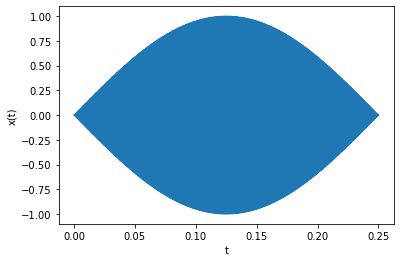

In [140]:
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

<b> 2. Compute the signal summary properties from the time domain
description of the signal. </b>

In [141]:
#Revisar
mean_x = 1/T * sum([s for s in x])
P_x = 1/T * sum([s ** 2 for s in x]) * 1/Fs
E_x = P_x * T 
var_x = P_x - mean_x ** 2

<b> 3. Compute and graph the Fourier Transform of this signal. </b>


In [142]:
import scipy as sp

X = np.fft.fft(x)
#X = sp.fft(x)
X_mag = np.abs(X)
k = np.arange(0, np.int(np.floor(Fs/2)), Fs/len(t))

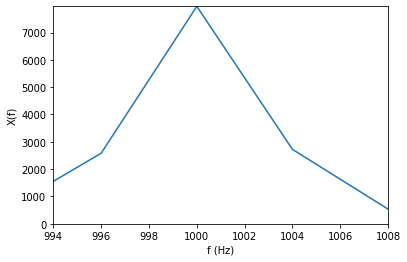

In [144]:
plt.plot(k, X_mag[:len(k)])
plt.xlabel('f (Hz)')
plt.ylabel('X(f)')
plt.axis([994, 1008, min(X_mag[:len(k)]), max(X_mag[:len(k)])])
plt.show()

<b> 4. Compute the signal summary properties from the frequency domain
description of the signal. </b>

In [149]:
x_f_mean = 1/T * X_mag[0]
E_f_x = np.mean(X_mag ** 2) * 1/Fs

In [150]:
print(mean_x)
print(x_f_mean)

print(E_x)
print(E_f_x)

9.143009313788541e-12
9.230461880949115e-12
0.062497500000000074
0.06249749999999996


<b> 5. Sample this signal at an 8 kHz sample rate. </b>


In [151]:
Fs = 8000
n_points = np.int(np.ceil(Fs/4))
n1 = np.linspace(0, 1/4, n_points)
n2 = np.linspace(1/4, 1/2, n_points)
xn1 = np.sin(2000 * np.pi * n1) * np.sin(4 * np.pi * n2)
xn2 = np.zeros(n2.shape)
n = np.concatenate((n1, n2))
xn = np.concatenate((xn1, xn2))
xn = -xn

<b> 6. Use sine function interpolation to estimate the original signal from its
samples, and compare with the original signal. Explain any differences. </b>

In [44]:
x_interp_2fs = []
t_interp_2fs = np.arange(0, 0.01, 1/(2 * Fs))
for tt in t_interp_2fs:
    x_interp_2fs.append(sum([xn[nn] * np.sinc(Fs * tt - nn) for nn in range(len(n))]))

In [45]:
x_interp_3fs = []
t_interp_3fs = np.arange(0, 0.01, 1/(3 * Fs))
for tt in t_interp_3fs:
    x_interp_3fs.append(sum([xn[nn] * np.sinc(Fs * tt - nn) for nn in range(len(n))]))

In [46]:
x_interp_625fs = []
t_interp_625fs = np.arange(0, 0.01, 1/(6.25 * Fs))
for tt in t_interp_625fs:
    x_interp_625fs.append(sum([xn[nn] * np.sinc(Fs * tt - nn) for nn in range(len(n))]))

O sinal interpolado é gerado a partir de um grid mais fino em relação ao grid original, ou seja, há mais pontos em que a função $x$ é avaliada, fornecendo uma aparência de sinal contínuo (o que é apenas uma ilusão, dado que nenhum sinal digital é contínuo). As duas figuras abaixo foram geradas com $F'_s = 2F_s$ e $F'_s = 3F_s$, respectivamente. É visível que na primeira figura há a adição de 1 ponto interpolado a cada 2 pontos originais do sinal discreto, o que corrobora com a frequência de amostragem duplicada. Analogamente, na segunda figura há 2 pontos de interpolação a cada 2 pontos do sinal original.

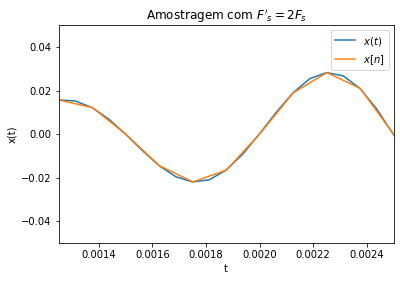

In [47]:
plt.plot(t_interp_2fs, x_interp_2fs, label='$x(t)$')
plt.plot(n, xn, label='$x[n]$')
plt.axis([10 * 1/Fs, 20 * 1/Fs, -0.05, 0.05])
plt.title("Amostragem com $F'_s = 2F_s$")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

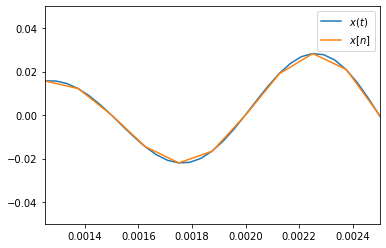

In [48]:
plt.plot(t_interp_3fs, x_interp_3fs, label='$x(t)$')
plt.plot(n, xn, label='$x[n]$')
plt.axis([10 * 1/Fs, 20 * 1/Fs, -0.05, 0.05])
plt.legend()

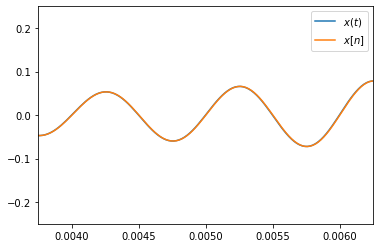

In [153]:
plt.plot(t_interp_625fs, x_interp_625fs, label='$x(t)$')
#plt.plot(n, xn, label='$x[n]$')
plt.plot(t, x, label='$x[n]$')
plt.axis([30 * 1/Fs, 50 * 1/Fs, -0.25, 0.25])
plt.legend()